In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score

%matplotlib inline

In [38]:
data = pd.read_csv('drug200.csv')
data.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [40]:
print('Sex         : ', data.Sex.unique())
print('BP          : ', data.BP.unique())
print('Cholesterol : ', data.Cholesterol.unique())
print('Drugs       : ', data.Drug.unique())

Sex         :  ['F' 'M']
BP          :  ['HIGH' 'LOW' 'NORMAL']
Cholesterol :  ['HIGH' 'NORMAL']
Drugs       :  ['drugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [41]:
data.duplicated().sum()

0

In [42]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

---

<AxesSubplot:xlabel='Drug', ylabel='count'>

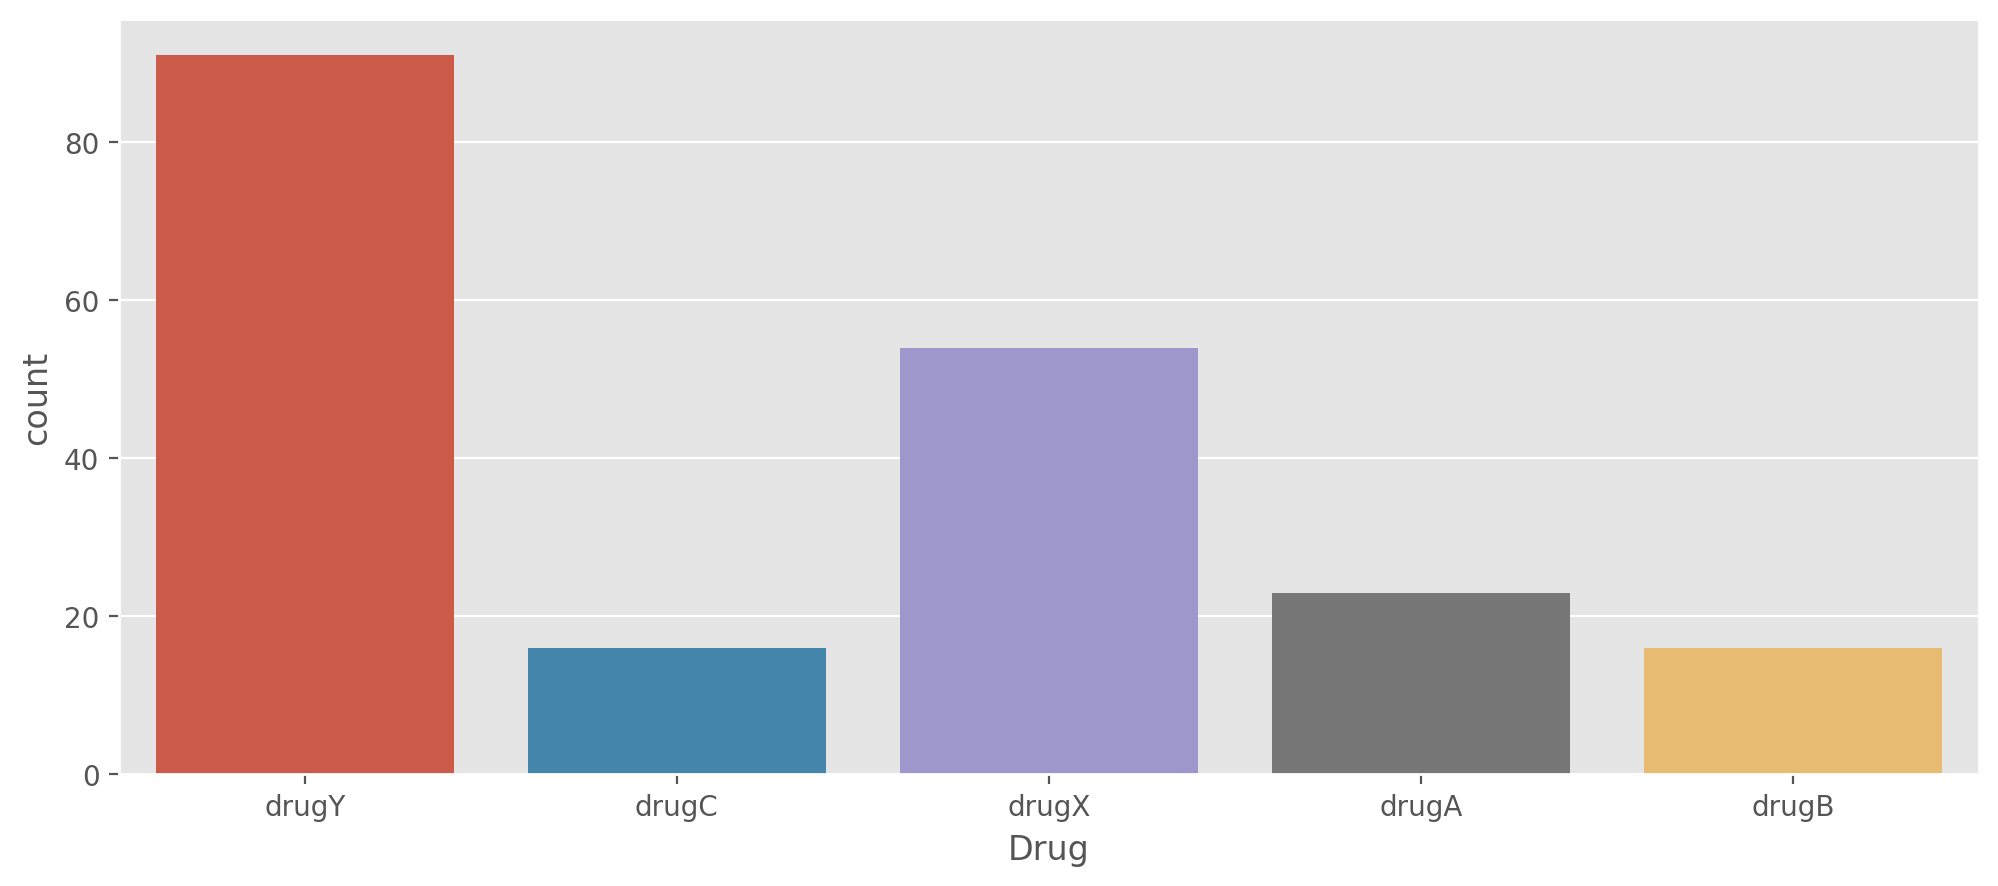

In [43]:
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot('Drug', data = data)

In [44]:
data.Drug.value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

<AxesSubplot:xlabel='Drug', ylabel='count'>

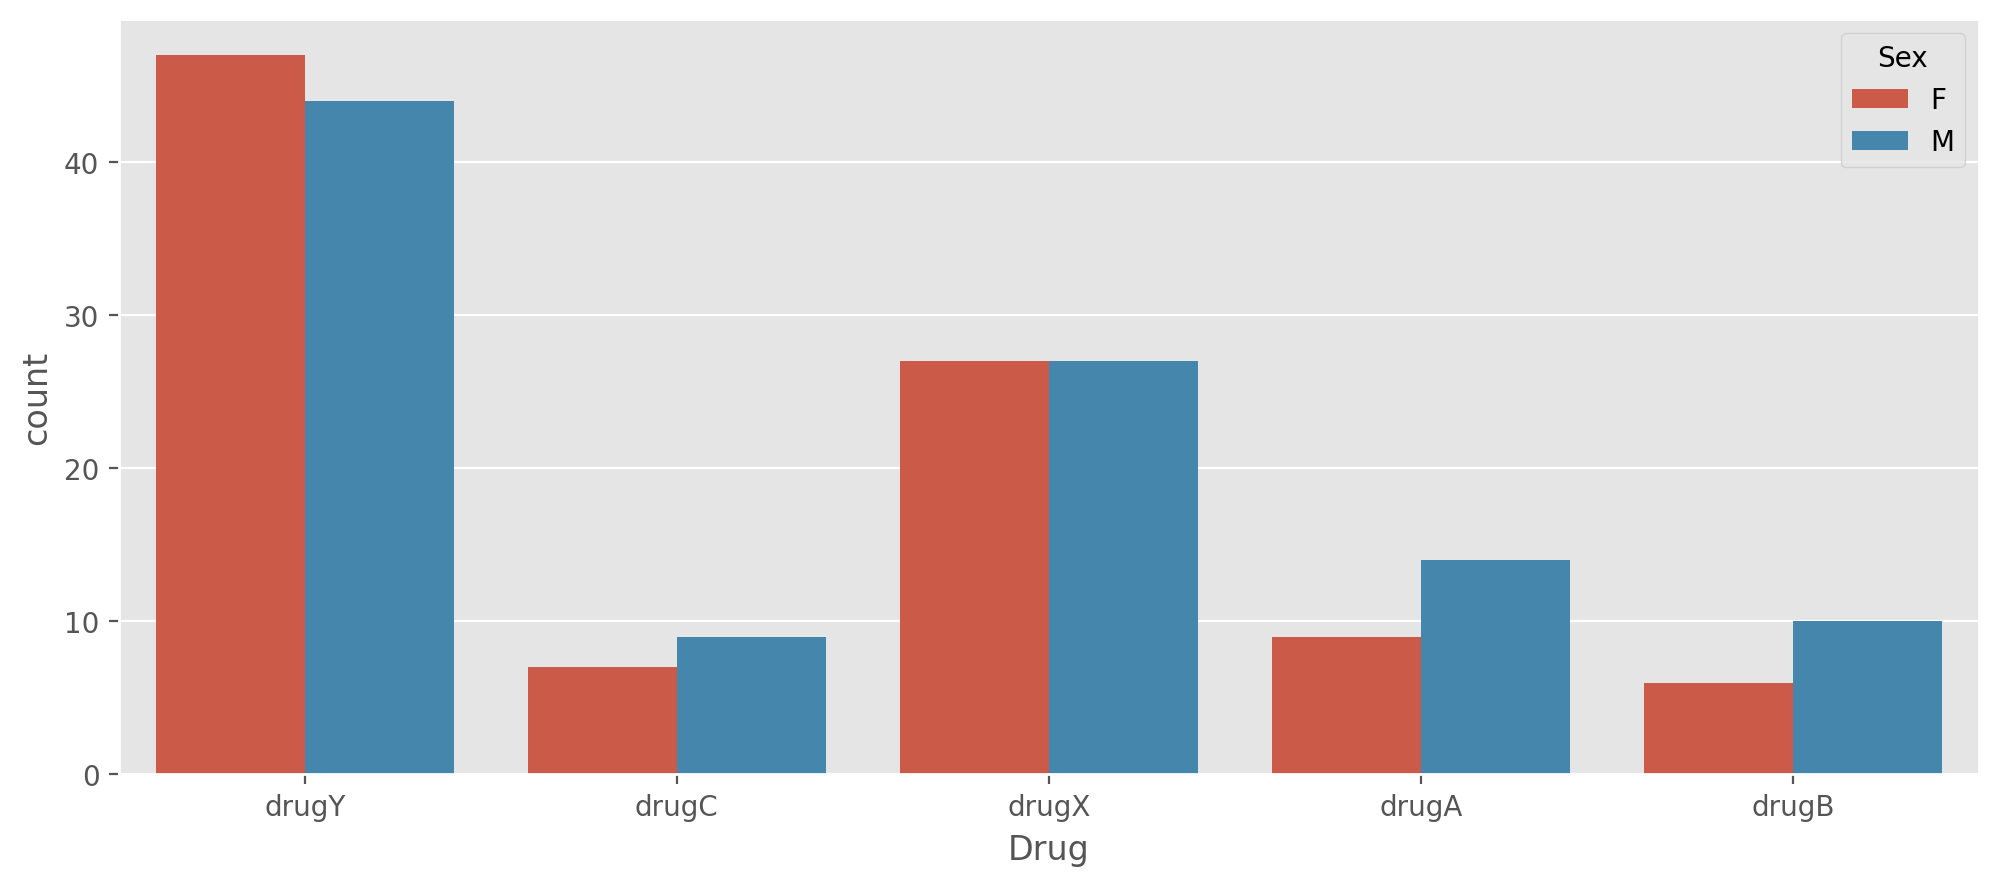

In [45]:
# Sex and Drug
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot('Drug', hue = 'Sex', data = data)

<AxesSubplot:xlabel='Drug', ylabel='count'>

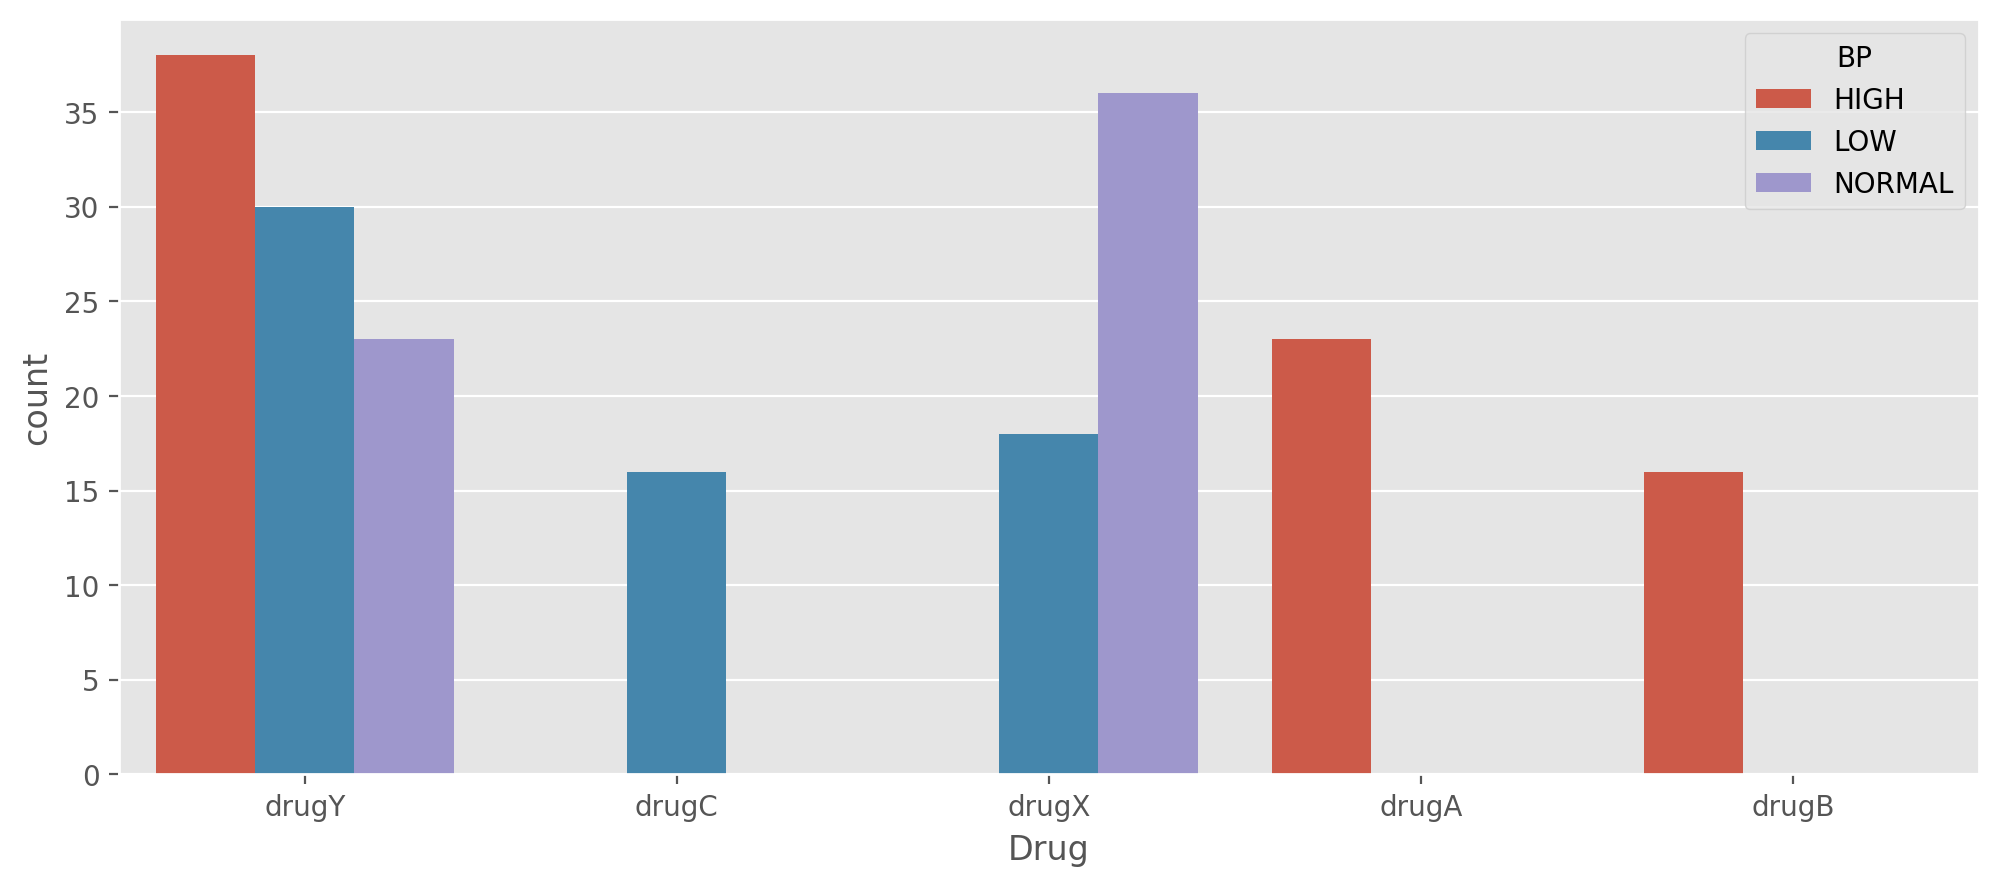

In [46]:
# BP and Drug
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot('Drug', hue = 'BP', data = data)

<AxesSubplot:xlabel='Drug', ylabel='count'>

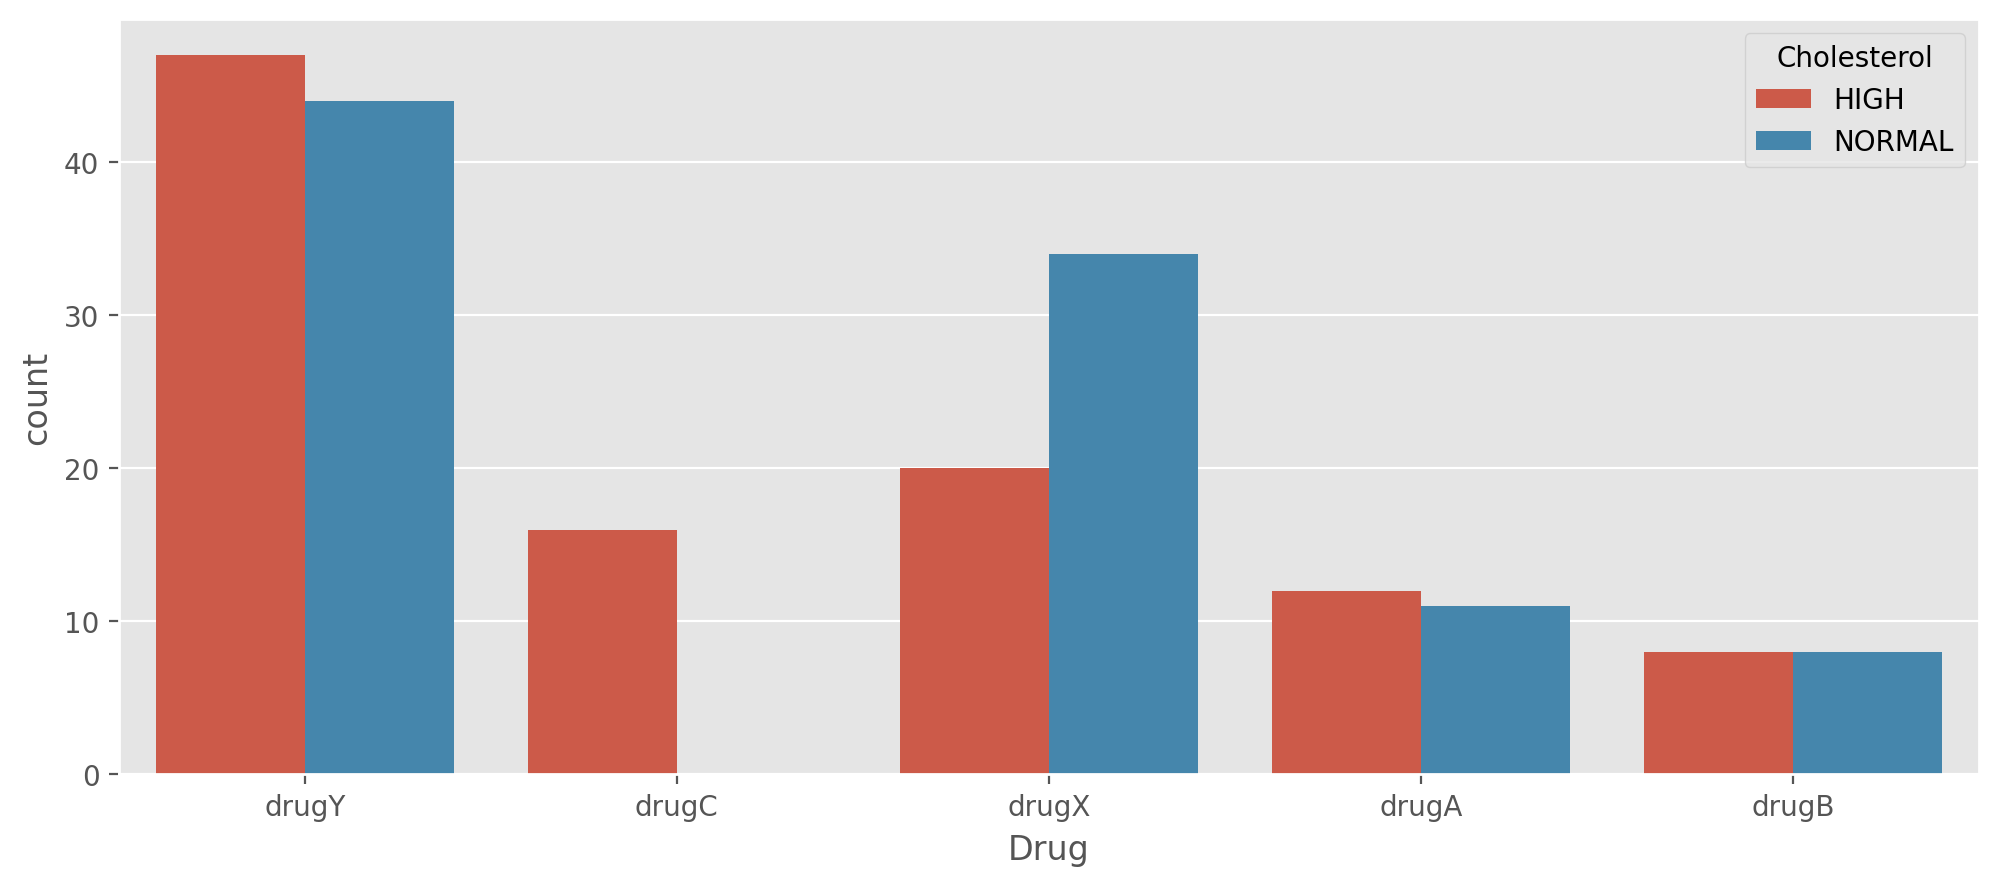

In [47]:
# Cholesterol and Drug
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot('Drug', hue = 'Cholesterol', data = data)

<AxesSubplot:ylabel='Age'>

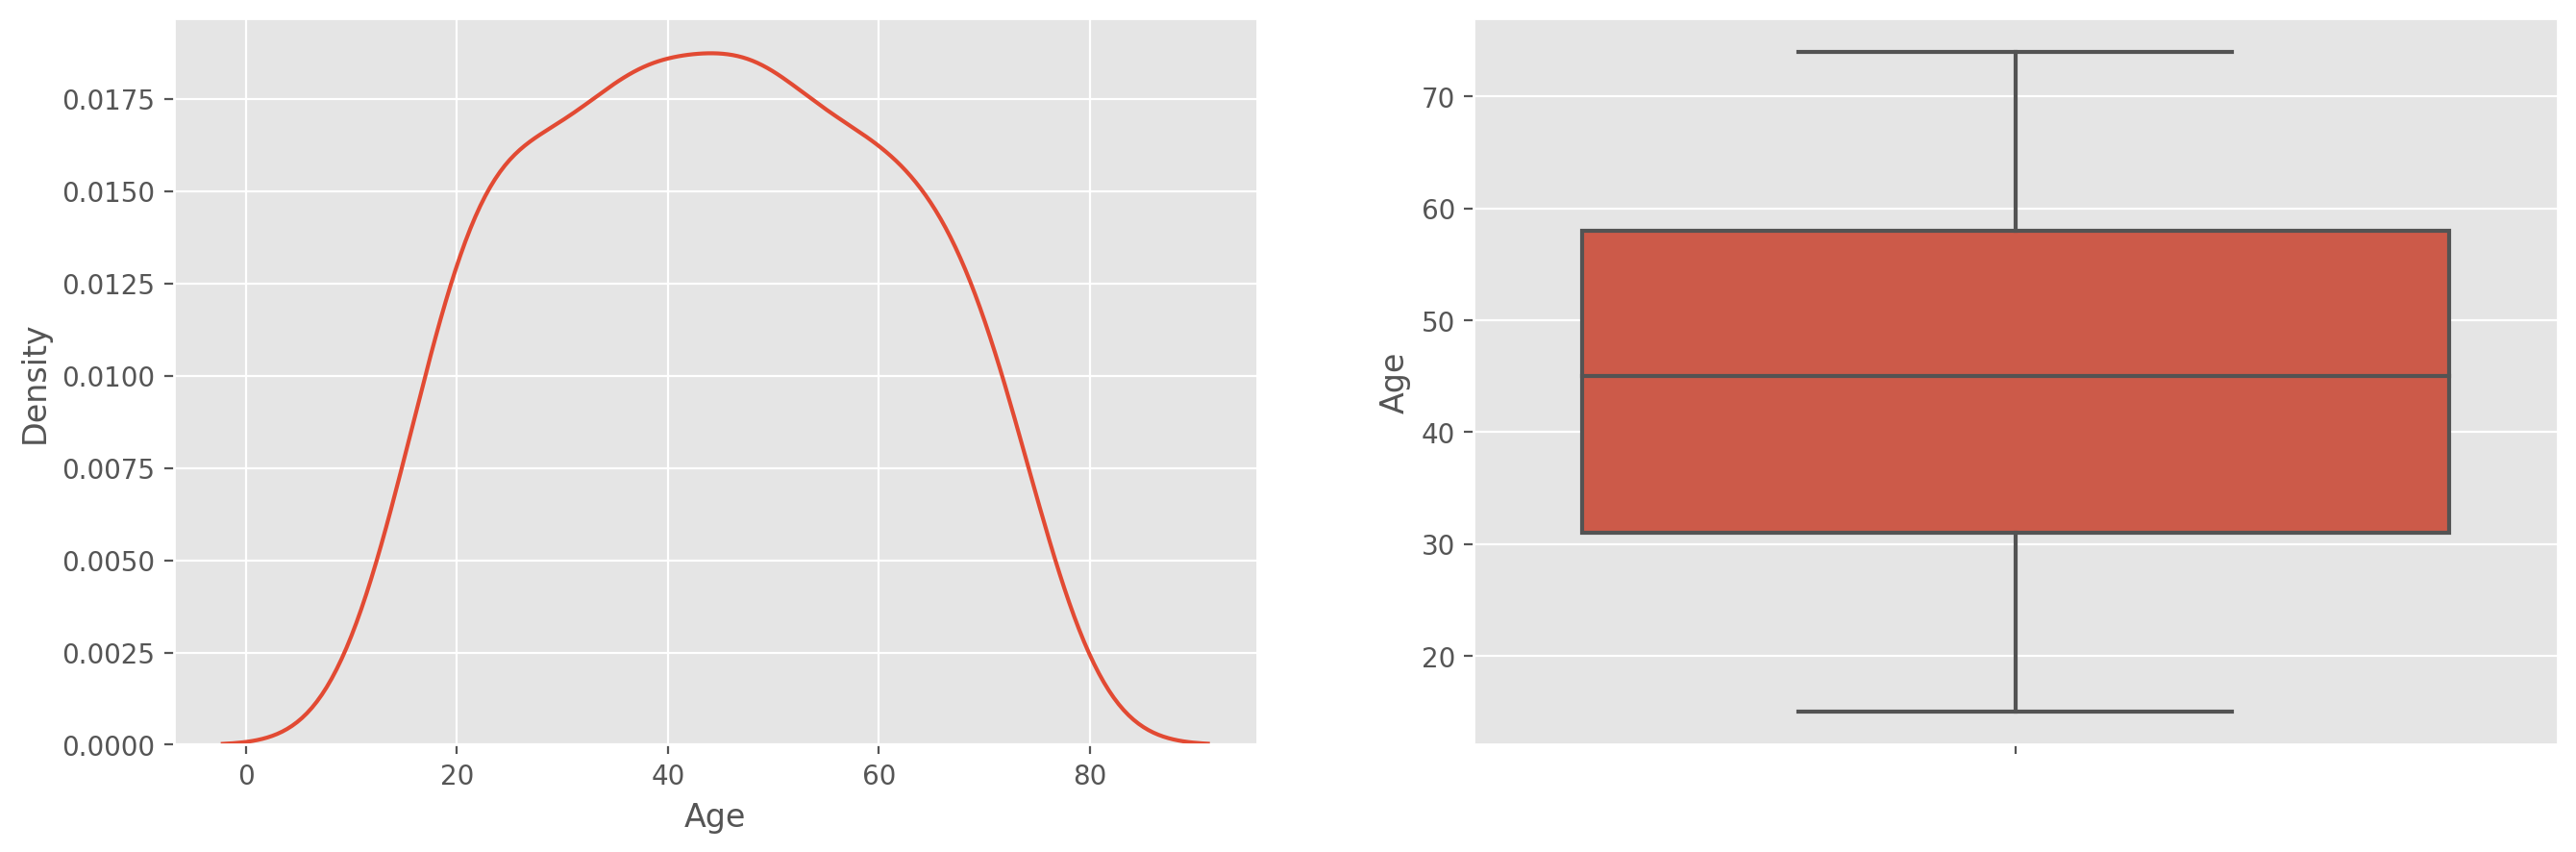

In [48]:
# Age
plt.figure(figsize = (16,5), dpi = 200)
plt.subplot(1,2,1)
sns.distplot(data['Age'], hist = False)
plt.subplot(1,2,2)
sns.boxplot(y = data['Age'])

<AxesSubplot:xlabel='Drug', ylabel='Age'>

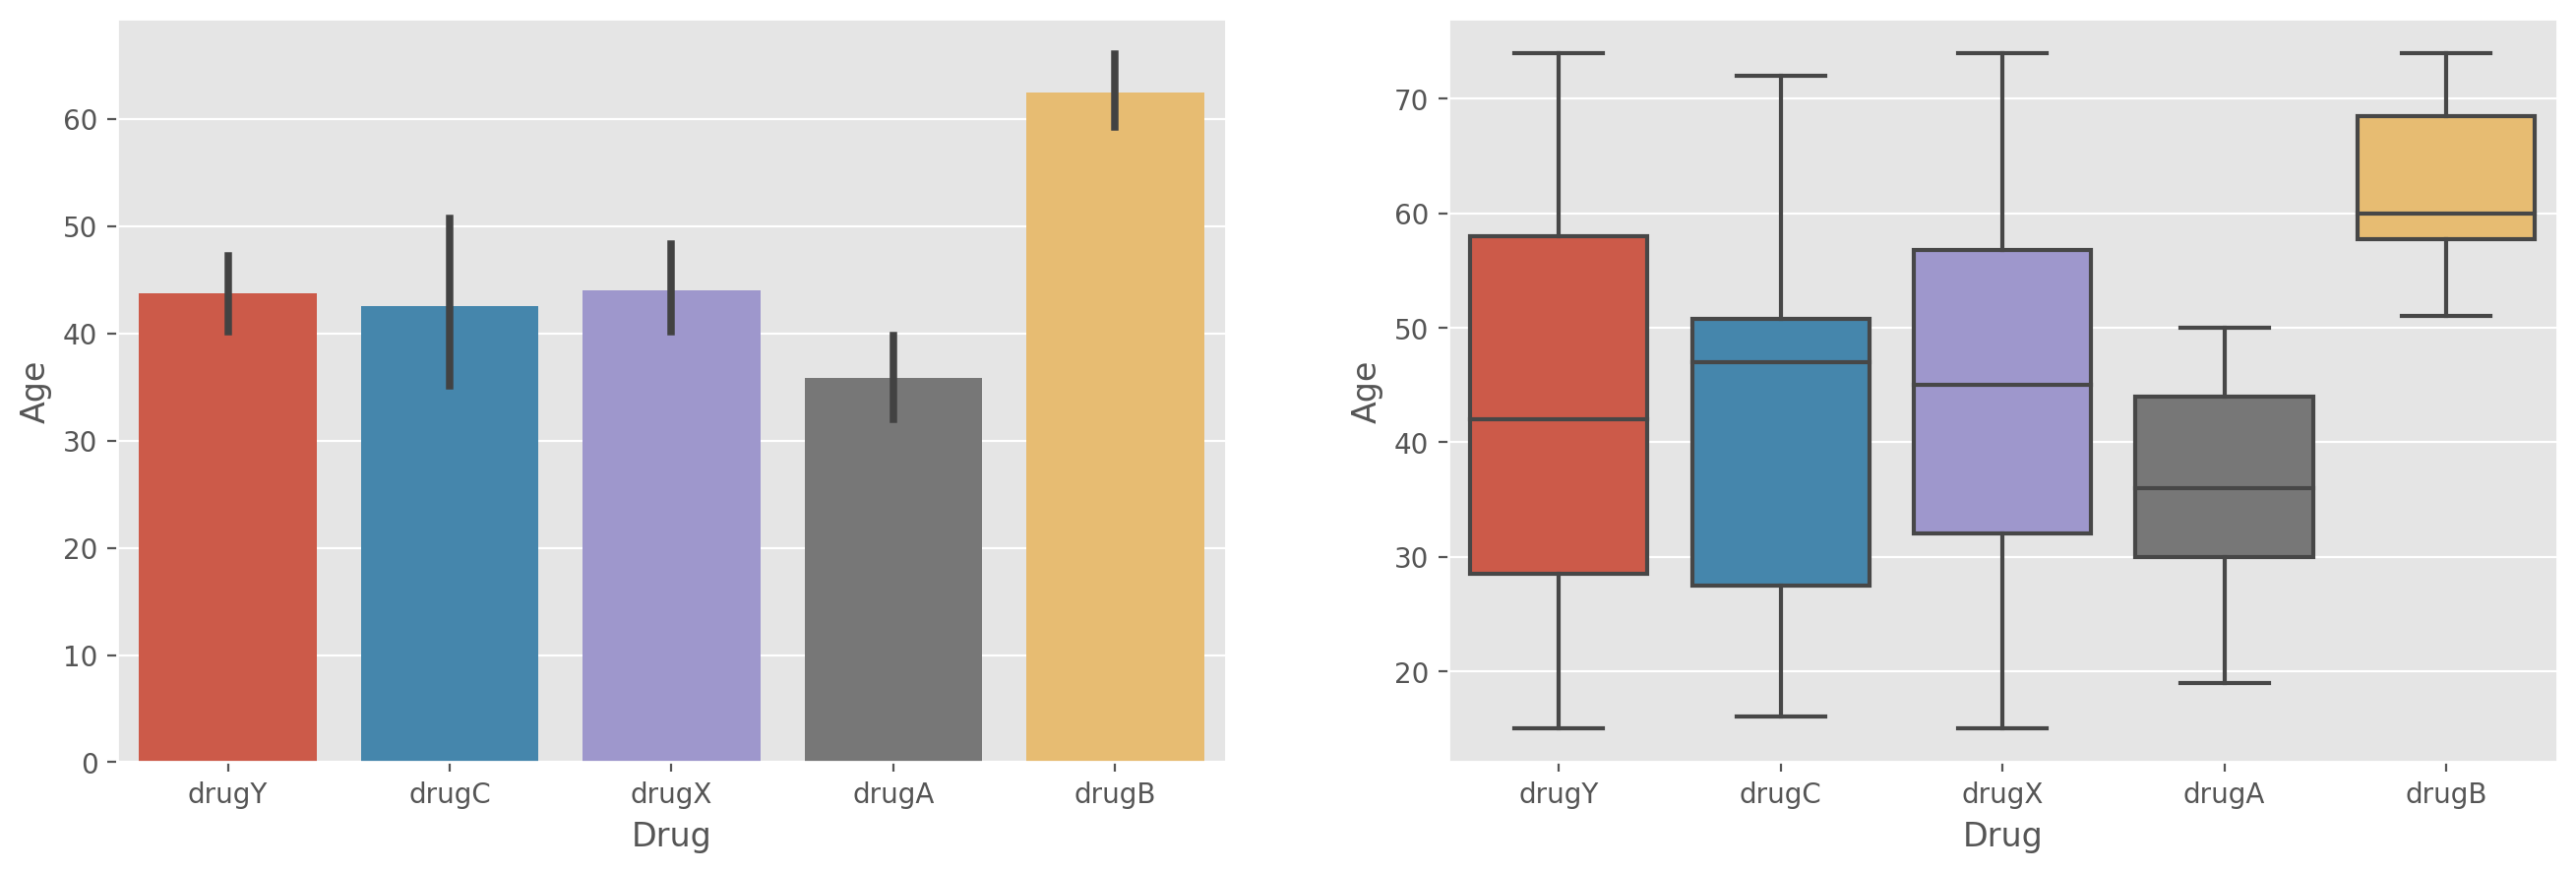

In [49]:
# Age and Drug
plt.figure(figsize = (16,5), dpi = 200)
plt.subplot(1,2,1)
sns.barplot('Drug', 'Age', data = data)
plt.subplot(1,2,2)
sns.boxplot('Drug', 'Age', data = data)

<AxesSubplot:ylabel='Na_to_K'>

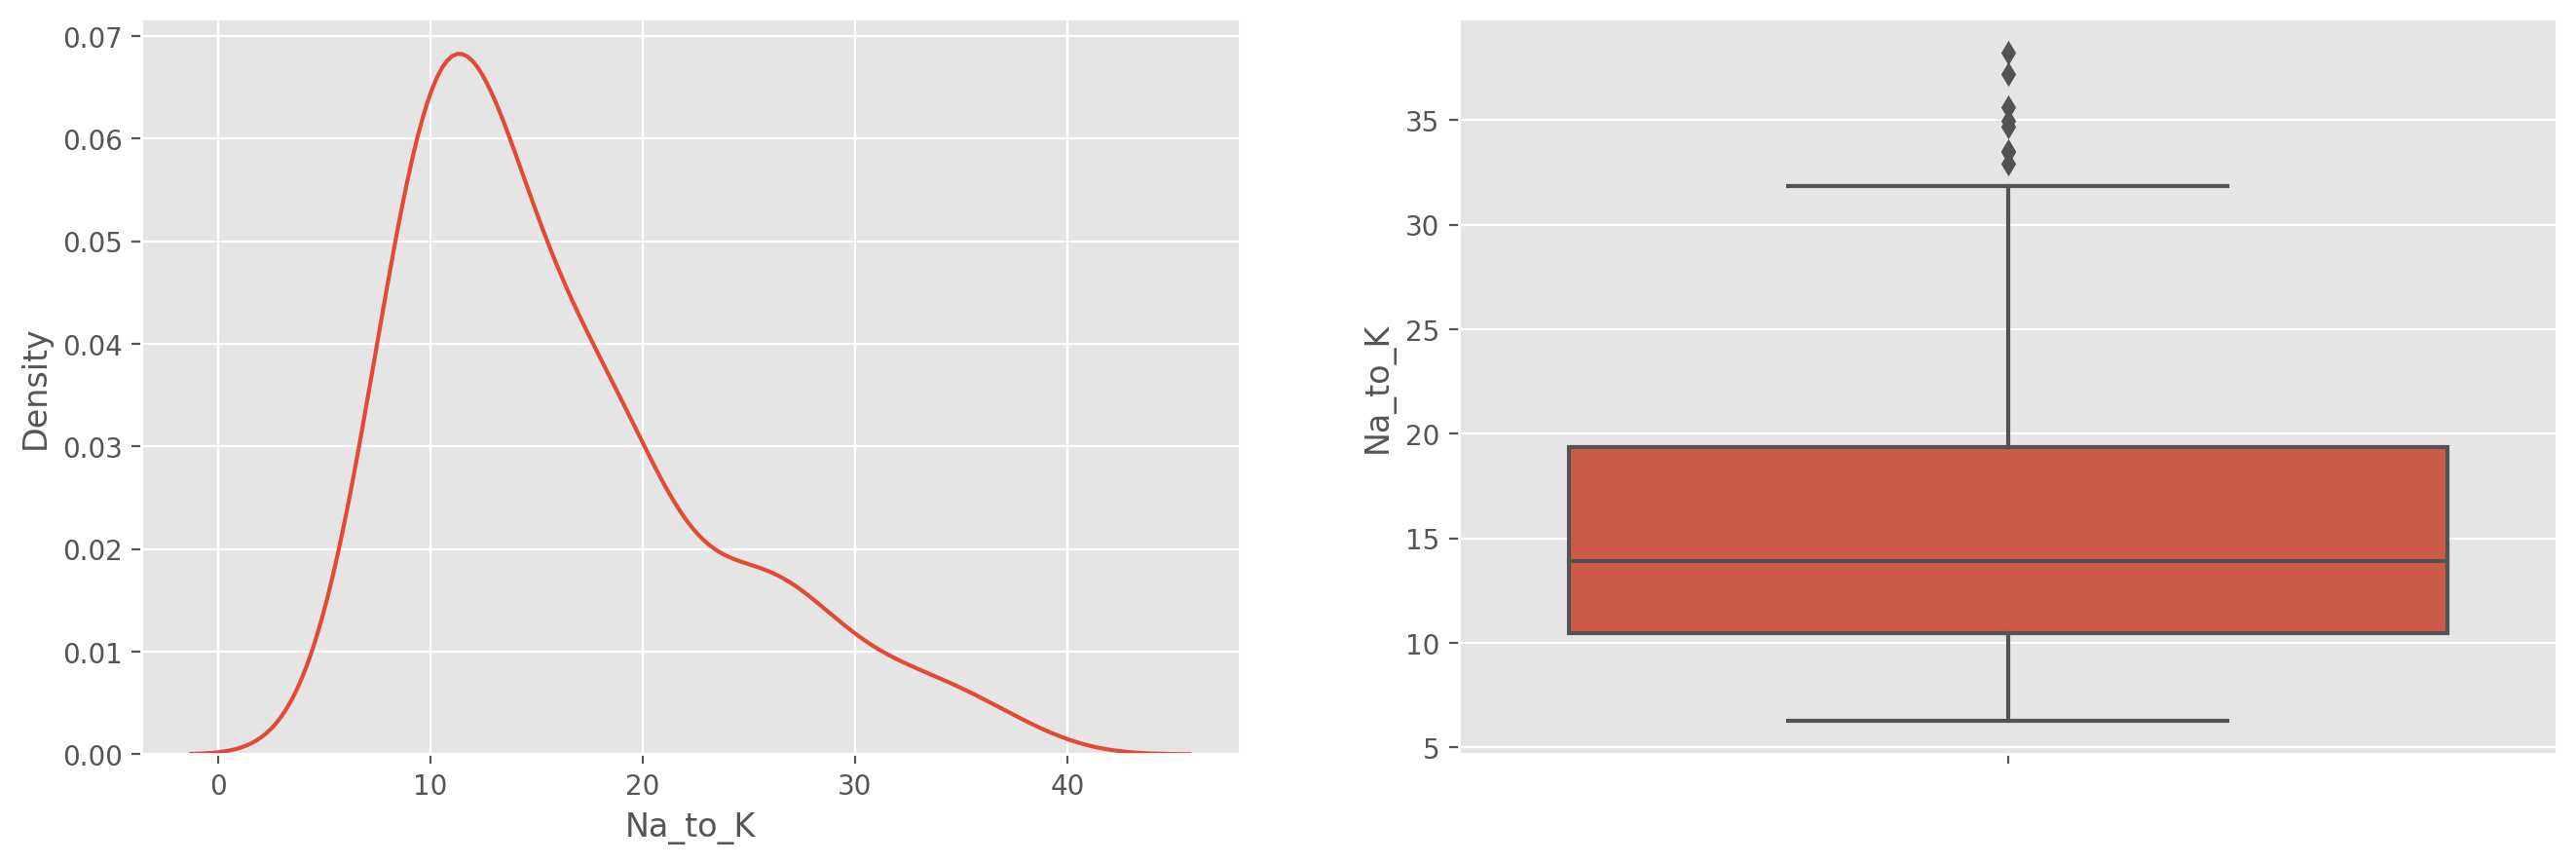

In [50]:
# Na_to_K
plt.figure(figsize = (16,5), dpi = 200)
plt.subplot(1,2,1)
sns.distplot(data['Na_to_K'], hist = False)
plt.subplot(1,2,2)
sns.boxplot(y = data['Na_to_K'])

<AxesSubplot:xlabel='Drug', ylabel='Na_to_K'>

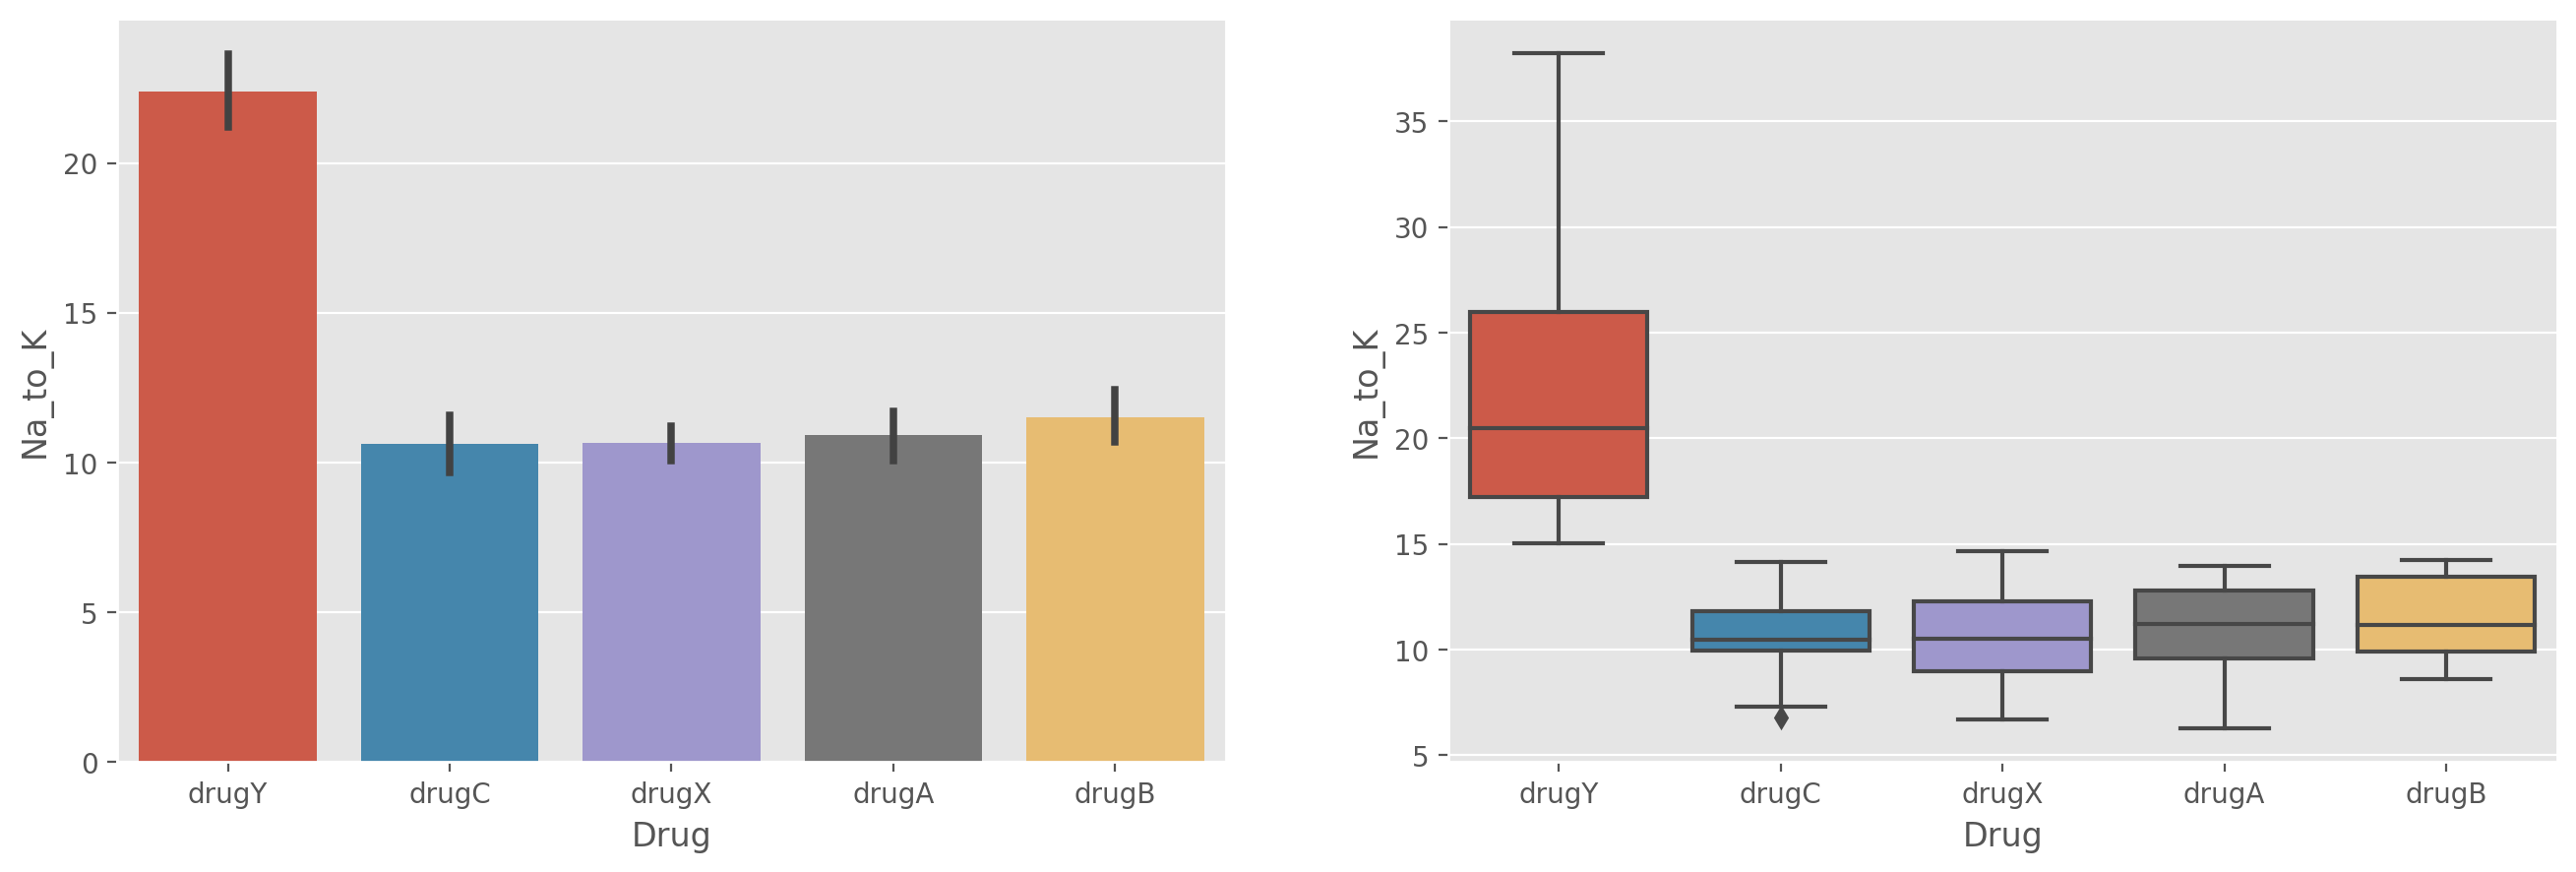

In [51]:
# Na_to_K ands Drug
plt.figure(figsize = (16,5), dpi = 200)
plt.subplot(1,2,1)
sns.barplot('Drug', 'Na_to_K', data = data)
plt.subplot(1,2,2)
sns.boxplot('Drug', 'Na_to_K', data = data)

---
----

In [52]:
cols = ['BP', 'Cholesterol', 'Sex', 'Age', 'Na_to_K']
X = data[cols]
Y = data[['Drug']]

print('Independent Feature Set Shape : ', X.shape)
print('Dependent Feature Shape       : ', Y.shape)

Independent Feature Set Shape :  (200, 5)
Dependent Feature Shape       :  (200, 1)


In [53]:
X.head()

,BP,Cholesterol,Sex,Age,Na_to_K
0,HIGH,HIGH,F,23,25.355
1,LOW,HIGH,M,47,13.093
2,LOW,HIGH,M,47,10.114
3,NORMAL,HIGH,F,28,7.798
4,LOW,HIGH,F,61,18.043


In [54]:
Y.head()

,Drug
0,drugY
1,drugC
2,drugC
3,drugX
4,drugY


In [55]:
# Encoding
X.Sex = X.Sex.map({'M': 0, 'F': 1})
X.Cholesterol = X.Cholesterol.map({'NORMAL': 0, 'HIGH': 1})
X.BP = X.BP.map({'LOW': 0, 'NORMAL': 1, 'HIGH': 2})

X.head(10)

,BP,Cholesterol,Sex,Age,Na_to_K
0,2,1,1,23,25.355
1,0,1,0,47,13.093
2,0,1,0,47,10.114
3,1,1,1,28,7.798
4,0,1,1,61,18.043
5,1,1,1,22,8.607
6,1,1,1,49,16.275
7,0,1,0,41,11.037
8,1,1,0,60,15.171
9,0,0,0,43,19.368


In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [57]:
print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (160, 5)
Training Labels Shape :  (160, 1)
Testing Data Shape    :  (40, 5)
Testing Labels Shape  :  (40, 1)


---
# =====================================================
---

# Random Forest Classifier
RandomForestClassifier(
>     bootstrap=True, class_weight=None, criterion='entropy',
      max_depth=10, max_features='auto', max_leaf_nodes=None,
      min_impurity_decrease=0.0, min_impurity_split=None,
      min_samples_leaf=1, min_samples_split=2,
      min_weight_fraction_leaf=0.0, n_estimators=10,
      n_jobs=None, oob_score=False, random_state=14,verbose=0,
      warm_start=False)

In [60]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', max_depth = 4)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=50)

In [61]:
pred_train = classifier.predict(x_train)
pred_test = classifier.predict(x_test)

print('Training Set Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing Set Accuracy  : ', accuracy_score(y_test, pred_test))

Training Set Accuracy :  1.0
Testing Set Accuracy  :  0.975


# ====================================================

---
# XGBoost
>   base_score=0.5, booster='gbtree', colsample_bylevel=1,
    colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
    importance_type='gain', interaction_constraints='',
    learning_rate=0.300000012, max_delta_step=0, max_depth=6,
    min_child_weight=1, missing=nan, monotone_constraints='()',
    n_estimators=5, n_jobs=4, num_parallel_tree=1,
    objective='multi:softprob', random_state=0, reg_alpha=0,
    reg_lambda=1, scale_pos_weight=None, subsample=1,
    tree_method='exact', use_label_encoder=True,
    validate_parameters=1, verbosity=None)

In [74]:
y_train_xgb = y_train.Drug.map({'drugA' : 0, 'drugB' : 1, 'drugC' : 2, 'drugX' : 3, 'drugY' : 4})
y_test_xgb  = y_test.Drug.map({'drugA' : 0, 'drugB' : 1, 'drugC' : 2, 'drugX' : 3, 'drugY' : 4})

In [75]:
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators = 50, max_depth = 4)
classifier.fit(x_train, y_train_xgb)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, ...)

In [77]:
pred_train = classifier.predict(x_train)
pred_test = classifier.predict(x_test)

print('Training Set Accuracy : ', accuracy_score(y_train_xgb, pred_train))
print('Testing Set Accuracy  : ', accuracy_score(y_test_xgb, pred_test))

Training Set Accuracy :  1.0
Testing Set Accuracy  :  0.975


# ===================================================

---
# Light GBM
LGBMClassifier(
>  boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
   importance_type='split', learning_rate=0.1, max_depth=-1,
   min_child_samples=20, min_child_weight=0.001,min_split_gain=0.0,
   n_estimators=5, n_jobs=-1, num_leaves=31, objective=None,
   random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
   subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [78]:
from lightgbm import LGBMClassifier
classifier = LGBMClassifier(n_estimators = 50)
classifier.fit(x_train, y_train)

LGBMClassifier(n_estimators=50)

In [80]:
pred_train = classifier.predict(x_train)
pred_test = classifier.predict(x_test)

print('Training Set Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing Set Accuracy  : ', accuracy_score(y_test, pred_test))

Training Set Accuracy :  1.0
Testing Set Accuracy  :  1.0


# ====================================================

---
# Ada Boost
>   base_estimator=None, *, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R',random_state=None)

In [81]:
from sklearn.tree import DecisionTreeClassifier
estimator = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')

from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(estimator, n_estimators = 50)
classifier.fit(x_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=4))

In [82]:
pred_train = classifier.predict(x_train)
pred_test = classifier.predict(x_test)

print('Training Set Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing Set Accuracy  : ', accuracy_score(y_test, pred_test))

Training Set Accuracy :  1.0
Testing Set Accuracy  :  1.0


--------------
# =================================================
--------------

# Stacking

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

knn_classifier = KNeighborsClassifier(n_neighbors = 3)
dt_classifier  = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
rf_classifier  = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', max_depth = 4)

In [85]:
from sklearn.ensemble import VotingClassifier
classiffier = VotingClassifier([('knn', knn_classifier),
                                ('dt', dt_classifier),
                                ('rf', rf_classifier)], voting = 'hard')
classifier.fit(x_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=4))

In [86]:
pred_train = classifier.predict(x_train)
pred_test = classifier.predict(x_test)

print('Training Set Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing Set Accuracy  : ', accuracy_score(y_test, pred_test))

Training Set Accuracy :  1.0
Testing Set Accuracy  :  1.0
